# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2021s2



In [1]:
# TODO: RA & Name 
print('236129: ' + 'Guilherme Zeferino Rodrigues Dobins')
print('237833: ' + 'João Vitor Baptista Moreira')

236129: Guilherme Zeferino Rodrigues Dobins
237833: João Vitor Baptista Moreira


## Objective: Predict cancer mortality rates for US counties. 

Explore **linear regression** alternatives and come up with the best possible model to the problems, avoiding overfitting. In particular, predict the **TARGET_deathRate** from their attributes.

## Dataset

These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov.  

The dataset contains the death rate and attributes of 3,047 counties.

Dataset Information: You should respect the following traininig/test split: 2042 training examples, and 305 test examples.

There are 33 attributes as follows: 

Data Dictionary

- 1: **avgAnnCount**: Mean number of reported cases of cancer diagnosed annually (a)

- 2: **avgDeathsPerYear**: Mean number of reported mortalities due to cancer (a)

- 3: **incidenceRate**: Mean per capita (100,000) cancer diagoses(a)

- 4: **medianIncome**: Median income per county (b)

- 5: **popEst2015**: Population of county (b)

- 6: **povertyPercent**: Percent of populace in poverty (b)

- 7: **studyPerCap**: Per capita number of cancer-related clinical trials per county (a)

- 8: **binnedInc**: Median income per capita binned by decile (b)

- 9: **MedianAge**: Median age of county residents (b)

- 10: **MedianAgeMale**: Median age of male county residents (b)

- 11: **MedianAgeFemale**: Median age of female county residents (b)

- 12: **Geography**: County name (b)

- 13: **AvgHouseholdSize**: Mean household size of county (b)

- 14: **PercentMarried**: Percent of county residents who are married (b)

- 15: **PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school (b)

- 16: **PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

- 17: **PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college (b)

- 18: **PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

- 19: **PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

- 20: **PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

- 21: **PctEmployed16_Over**: Percent of county residents ages 16 and over employed (b)

- 22: **PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed (b)

- 23: **PctPrivateCoverage**: Percent of county residents with private health coverage (b)

- 24: **PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) (b)

- 25: **PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage (b)

- 26: **PctPublicCoverage**: Percent of county residents with government-provided health coverage (b)

- 27: **PctPubliceCoverageAlone**: Percent of county residents with government-provided health coverage alone (b)

- 28: **PctWhite**: Percent of county residents who identify as White (b)

- 29: **PctBlack**: Percent of county residents who identify as Black (b)

- 30: **PctAsian**: Percent of county residents who identify as Asian (b)

- 31: **PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

- 32: **PctMarriedHouseholds**: Percent of married households (b)

- 33: **BirthRate**: Number of live births relative to number of women in county (b)

- **TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer mortalities (a)

(a): years 2010-2016

(b): 2013 Census Estimates


The data is available at
- train: https://tinyurl.com/53zvz9t7
- test: https://tinyurl.com/phs3bkbt


## Activities


# Questão 1

1. (5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables?




## Importação dos dados

In [2]:
# TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("data-train.csv")

## Tratamento dos dados

In [3]:
pd.set_option('display.max_columns', None)
df.shape

(2742, 34)

In [4]:
df.head()

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,target_deathrate
0,170.0,76,456.6,40012,27451,16.1,0.000000,"(37413.8, 40362.7]",43.2,42.1,44.4,"Mineral County, West Virginia",2.40,44.2,9.5,48.4,37.3,4.8,50.2,8.5,47.0,8.8,58.6,45.1,41.6,39.4,23.3,94.815349,3.145379,0.299045,0.169339,42.973813,7.391231,198.4
1,232.0,84,480.5,54441,43011,11.4,0.000000,"(51046.4, 54545.6]",38.2,37.1,39.2,"Muscatine County, Iowa",2.59,56.3,15.7,32.9,NaN,8.0,35.0,13.5,63.9,4.6,74.9,54.7,49.4,33.6,15.6,91.939506,1.547317,1.242048,2.395544,55.221780,6.572521,170.9
2,652.0,325,371.0,57719,149568,10.4,608.418913,"(54545.6, 61494.5]",41.7,41.0,42.6,"Monroe County, Michigan",2.55,54.1,12.5,35.6,NaN,7.2,36.2,12.2,56.4,8.3,77.0,59.7,55.4,31.1,14.0,94.608338,2.322582,0.616874,0.607567,54.451388,6.102217,182.8
3,44.0,20,472.2,42624,6561,14.1,0.000000,"(40362.7, 42724.4]",44.8,43.3,47.6,"Bland County, Virginia",2.19,53.5,20.0,53.4,NaN,2.0,39.5,10.6,43.8,8.7,71.6,55.8,48.2,34.3,16.5,94.220955,5.028520,0.000000,0.000000,53.596021,5.213270,220.5
4,581.0,230,467.1,46849,97631,16.6,0.000000,"(45201, 48021.6]",42.0,41.5,42.7,"Steuben County, New York",2.36,50.5,17.2,38.3,NaN,7.0,37.6,11.1,54.6,8.2,66.4,49.1,45.4,39.9,20.7,94.978969,1.566918,1.529418,0.334465,46.999367,6.856742,178.7


In [5]:
df.isna().sum(axis = 0)

avganncount                   0
avgdeathsperyear              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2056
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          138
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     551
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

Como a coluna pctsomecol18_24 possui 2056 valores faltantes e o pctprivatecoveragealone 551 de 2742 possíveis, optamos por descartá-las, já que não nos ofereceriam informações suficientes para uma análise precisa. Já com relação à coluna pctemployed16_over, optamos por preencher os valores faltantes com a mediana dos valores, pois a maior parte dos dados estava no arquivo e perderíamos muitas informações excluindo ela por completo.

In [6]:
df.drop(columns=['pctsomecol18_24','pctprivatecoveragealone'], inplace= True)
df['pctemployed16_over'].fillna(df['pctemployed16_over'].median(),inplace=True)
df.isna().sum(axis = 0)

avganncount               0
avgdeathsperyear          0
incidencerate             0
medincome                 0
popest2015                0
povertypercent            0
studypercap               0
binnedinc                 0
medianage                 0
medianagemale             0
medianagefemale           0
geography                 0
avghouseholdsize          0
percentmarried            0
pctnohs18_24              0
pcths18_24                0
pctbachdeg18_24           0
pcths25_over              0
pctbachdeg25_over         0
pctemployed16_over        0
pctunemployed16_over      0
pctprivatecoverage        0
pctempprivcoverage        0
pctpubliccoverage         0
pctpubliccoveragealone    0
pctwhite                  0
pctblack                  0
pctasian                  0
pctotherrace              0
pctmarriedhouseholds      0
birthrate                 0
target_deathrate          0
dtype: int64

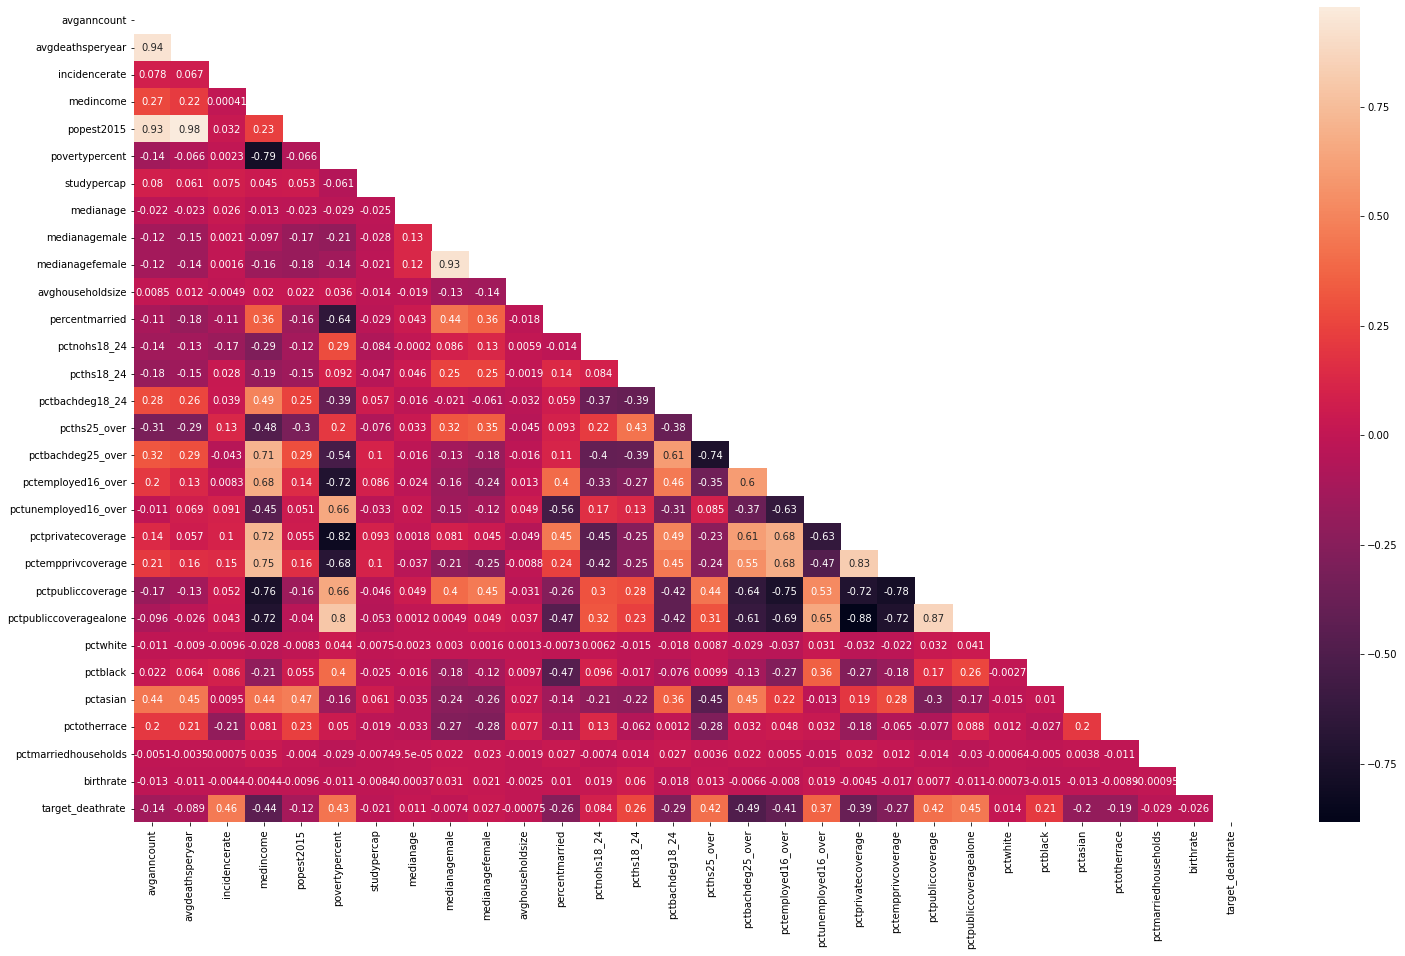

In [7]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot = True)

Analisando o heatmap de correlação das variáveis, realizamos algumas modificações no dataframe. A coluna geography foi descartada pois atua como um índice, já que todos os valores aparecem apenas uma vez. Já a coluna binnedinc também foi desconsiderada pois consideramos que ela seria redundante com relação ao medincome. Além disso, decidimos que seria interessante juntar as colunas avgdeathperyear e a popest2015 e criar a coluna avgdeath. Finalmente, descartamos várias colunas que, de acordo com o heatmap, possuíam grande correlação entre si, tanto direta quanto inversamente. Assim, deixamos os dados mais enxutos com apenas as colunas que julgamos ser mais importantes para o modelo analisar.

<Figure size 1080x1080 with 0 Axes>

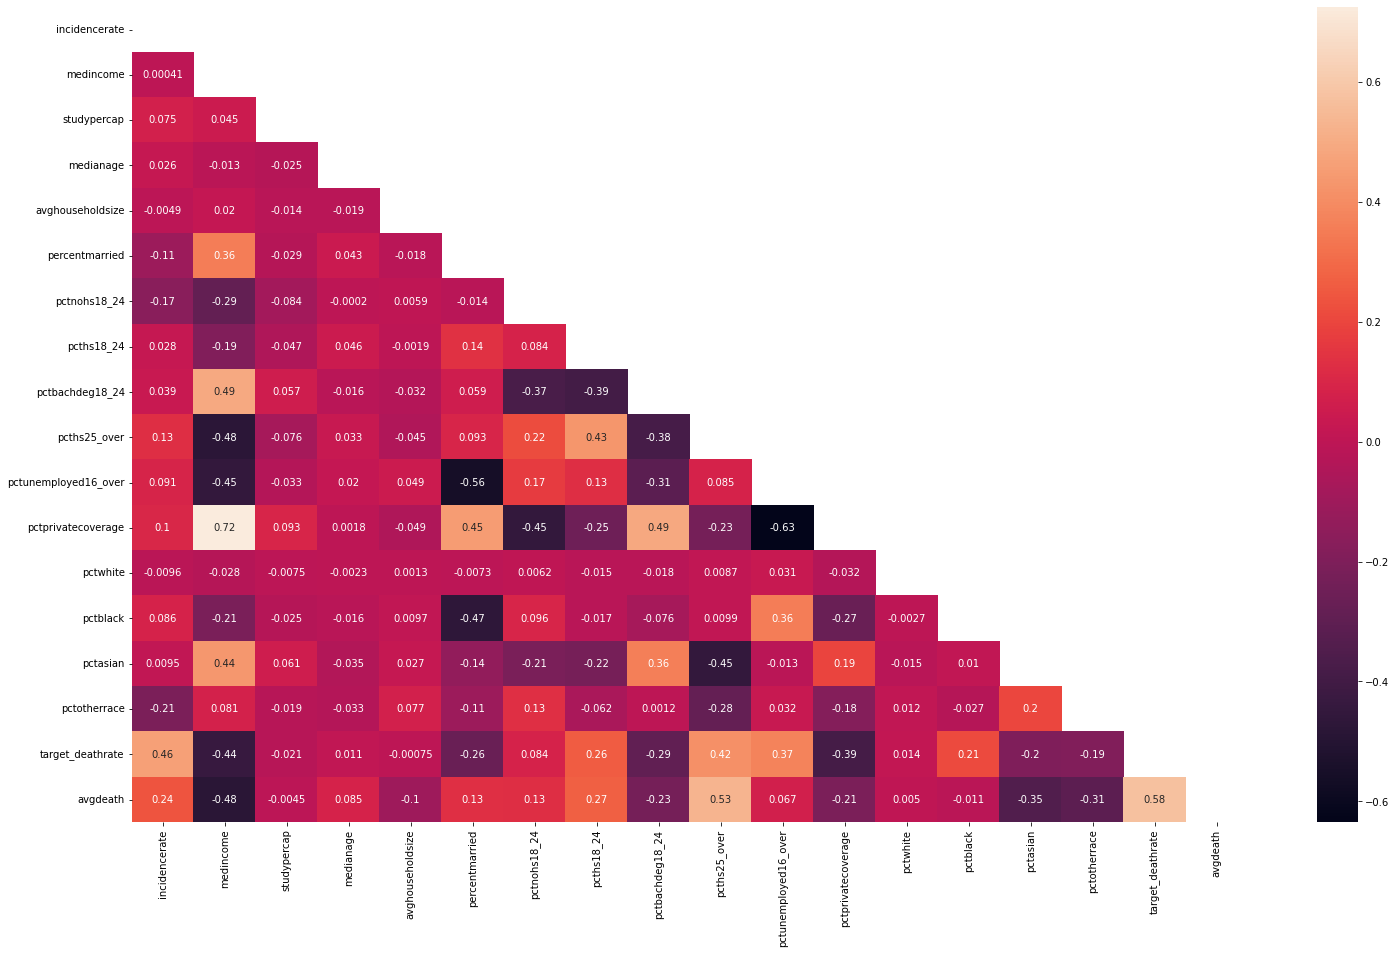

In [8]:
plt.figure(figsize=(15,15))
df['avgdeath']= (df['avgdeathsperyear']/ df['popest2015'])
df.drop(columns= [ "pctpubliccoveragealone","pctpubliccoverage", "binnedinc", "geography", "pctempprivcoverage","povertypercent",
                  "avgdeathsperyear","popest2015","avganncount","medianagemale","medianagefemale", "birthrate","pctmarriedhouseholds" ,
                  "pctbachdeg25_over","pctemployed16_over"], inplace = True)



corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot = True)

In [9]:
df.to_csv("dados_tratados.csv",index= False)

## Separação e normalização dos dados

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(columns= ['target_deathrate'])
y = pd.Series(df['target_deathrate'])
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_val = sc_x.transform(X_val)
y_train = y_train.ravel()
y_val = y_val.ravel()
X_train

array([[-0.4223952 , -0.47447185, -0.27018098, ..., -0.4405574 ,
        -0.35522515,  0.11103617],
       [ 1.10862432,  1.06316251, -0.27018098, ..., -0.35434361,
        -0.01155365, -1.34920241],
       [ 0.45883116,  1.20054221, -0.27018098, ..., -0.48680612,
         0.13441272,  2.1749065 ],
       ...,
       [ 1.32225495, -0.02343912, -0.27018098, ..., -0.41775613,
        -0.48618234, -0.28646118],
       [-0.00581547, -0.06133121, -0.27018098, ..., -0.09134464,
        -0.55713226,  3.36454484],
       [-0.33694294,  0.03423365, -0.27018098, ..., -0.18959943,
        -0.50683766, -0.37740602]])

## Implementação da Regressão Linear

In [14]:
# TODO: Linear Regression. Implement your solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries.
import random

In [15]:
def h_theta(thetas, x_i):
  thetas2=np.asmatrix(thetas)
  return float(np.matmul(thetas2, x_i))

In [16]:
def SGDLinReg(epochs, thetas, features, target, lr):
    n_feats = features.shape[1]+1
    n_data=features.shape[0] #numero de linhas do conjunto de treino
    features=np.c_[np.ones((n_data, 1)), features] #adiciona os valores de x0=1
    costs=np.zeros(epochs)
    iter=0
    for _ in range (epochs):
      cost_i=0
      for i in range(n_data):
          x_i=features[i]
          temp=[] 
          sqrt_cost = (h_theta(thetas,x_i)-target[i:i+1])
          cost_i+=sqrt_cost**2
          for j in range(n_feats):
              theta_temp = thetas[0, j] - lr*(sqrt_cost)*x_i[j]
              temp.append(theta_temp)
          for j in range(n_feats):
              thetas[0,j]=temp[j]
      costs[_]=cost_i/(2*n_data)

    return thetas, costs

In [17]:
def target_prediction(thetas, x_val):
  y=[]
  for i in range(x_val.shape[0]):
    x_i=[1]
    x_i=np.append(x_i, x_val[i])
    temp=[]
    y.append(h_theta(thetas, x_i))
  return y

In [18]:
def MSE(y_val, y_pred):
  ms_error=0
  n=y_val.shape[0]
  for i in range(n):
    ms_error+=(y_val[i]-y_pred[i])**2
  return ms_error/n

In [19]:
thetas=np.asmatrix([random.random() for i in range(18)])
coefs1, custos1=SGDLinReg(200, thetas, X_train, y_train, 0.0001)


In [20]:
y_pred_implementado=target_prediction(coefs1, X_val)

In [21]:
print("Erro quadratico medio do modelo implementado:",MSE(y_val, y_pred_implementado))

Erro quadratico medio do modelo implementado: 290.653674991873


## Comparação do modelo implementado com o do sklearn

In [22]:
# TODO: Linear Regression. You can use scikit-learn libraries.
#Utilizando o modelo do sklearn para comparação
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
mod = SGDRegressor()
mod.fit(X_train, y_train)
y_pred_sklearn = mod.predict(X_val)

print("Erro quadratico medio do modelo do sklearn:",MSE(y_val, y_pred_sklearn))


Erro quadratico medio do modelo do sklearn: 292.9731224096528


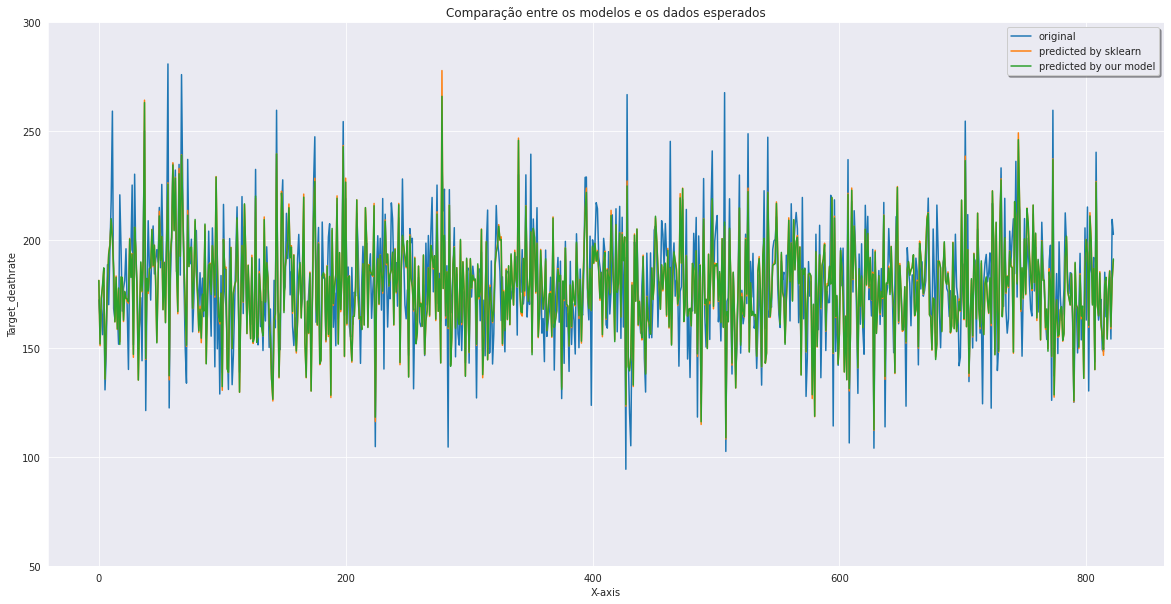

In [23]:
x_ax = range(len(y_val))
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Comparação entre os modelos e os dados esperados")
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, y_pred_sklearn, label="predicted by sklearn")
plt.plot(x_ax, y_pred_implementado, label="predicted by our model")
plt.xlabel('X-axis')
plt.ylabel('Target_deathrate')
plt.ylim(50,300)
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Conclusões da questão 1


 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

Antes de comparar os modelos em si, a primeira conclusão obtida foi na eficiência do treinamento, visto que a função implementada pelo grupo demorou consideravelmente mais que o treinamento utilizando o sklearn. Olhando então para os modelos obtidos, ao calcularmos o erro quadrático médio, é possível notar que os resultados são extremamente próximos (ambos apresentam erro de aproximadamente 290). Para confirmar a semelhança dos resultados, foram plotados os valores previstos em ambos os modelos, assim como os dados de validação, e nesse gráfico os valores dos dois modelos estão sobrepostos, como visto no gráfico acima. 

Com isso, concluímos que os resultados dos dois modelos foram adequados ao problema. Contudo, o modelo do scikit-learn é muito mais simples de ser gerado, não necessitando da implementação de nenhuma função adicional, sendo menos passível a erros de implementação do código, e também mais eficiente. Portanto não existe uma vantagem aparente (além de aprendizado) em criar as próprias funções, evidenciando a importância de bibliotecas como essa para problemas reais.




# Questão 2

2. (2 points) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


## Implementação da Equação Normal

In [24]:
X_train_normal = np.copy(X_train)
y_train_normal = np.copy(y_train)
X_val_normal = np.copy(X_val)
X_train_normal=np.c_[np.ones((X_train_normal.shape[0], 1)), X_train_normal] #adiciona os valores de x0=1
X_val_normal=np.c_[np.ones((X_val_normal.shape[0], 1)), X_val_normal] #adiciona os valores de x0=1
theta = np.linalg.inv(X_train_normal.T.dot(X_train_normal)).dot(X_train_normal.T).dot(y_train_normal)
theta = np.asmatrix(theta)
X_val_normal = np.asmatrix(X_val_normal)
y_pred_normal = np.matmul(X_val_normal,theta.T)
y_pred_normal = np.array(y_pred_normal)
mean_squared_error(y_val, y_pred_normal, squared=True)

290.5611821851269

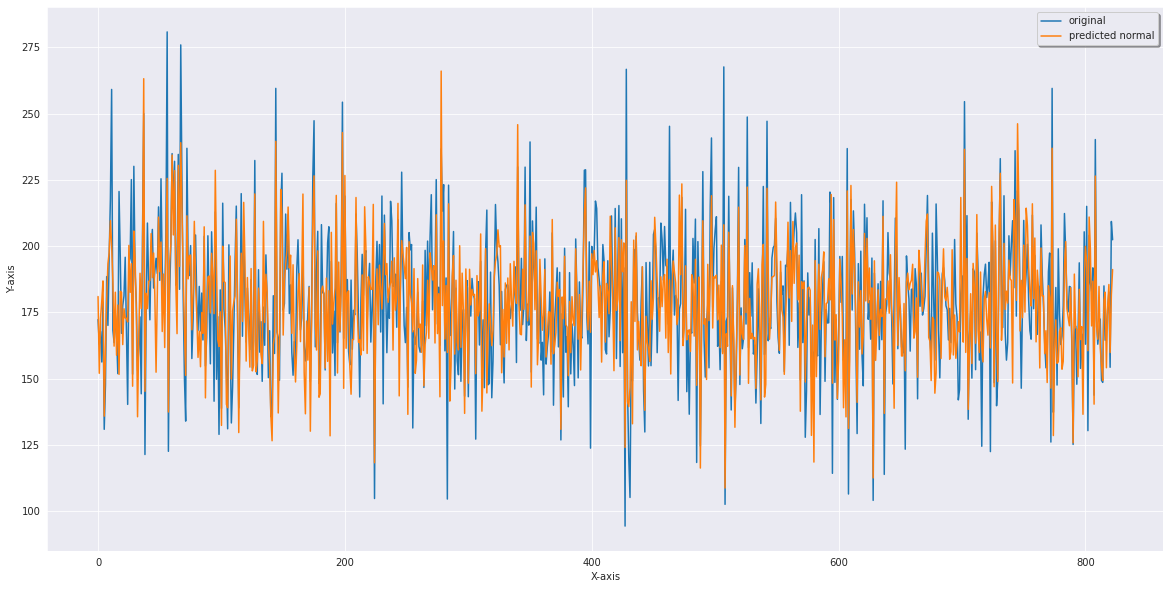

In [25]:
x_ax = range(len(y_val))
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, y_pred_normal, label="predicted normal")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Comparação dos modelos para diferentes learning rates

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


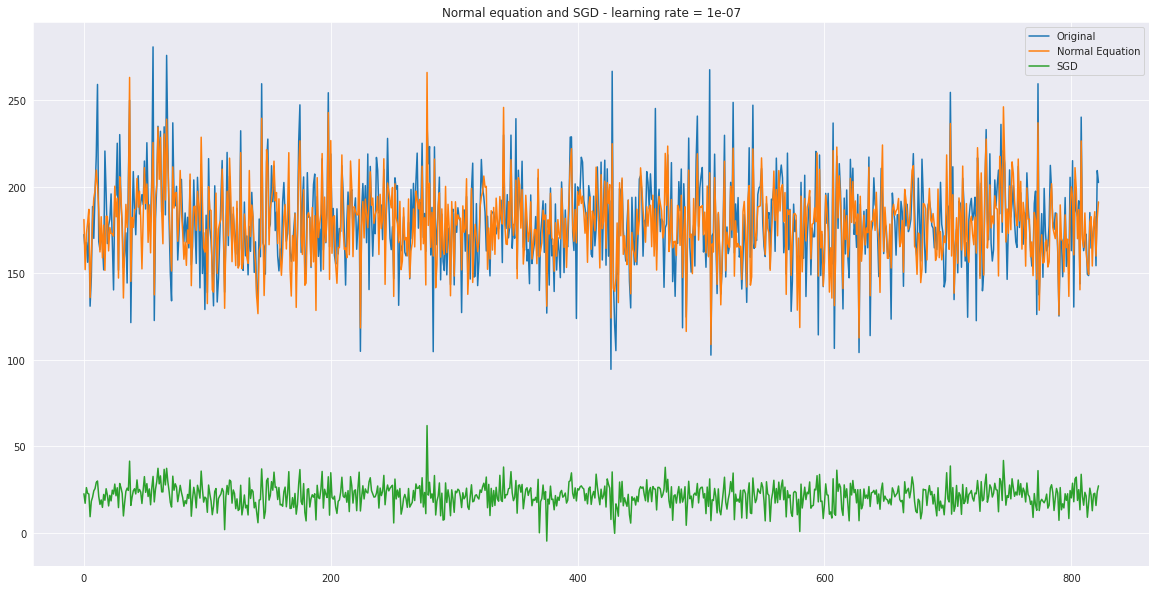

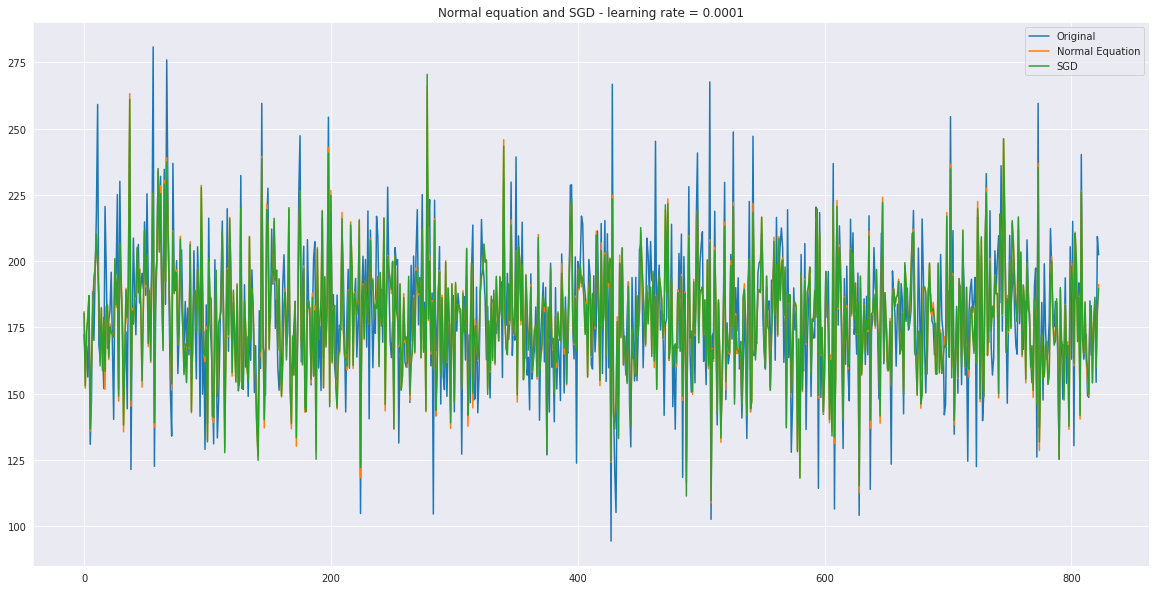

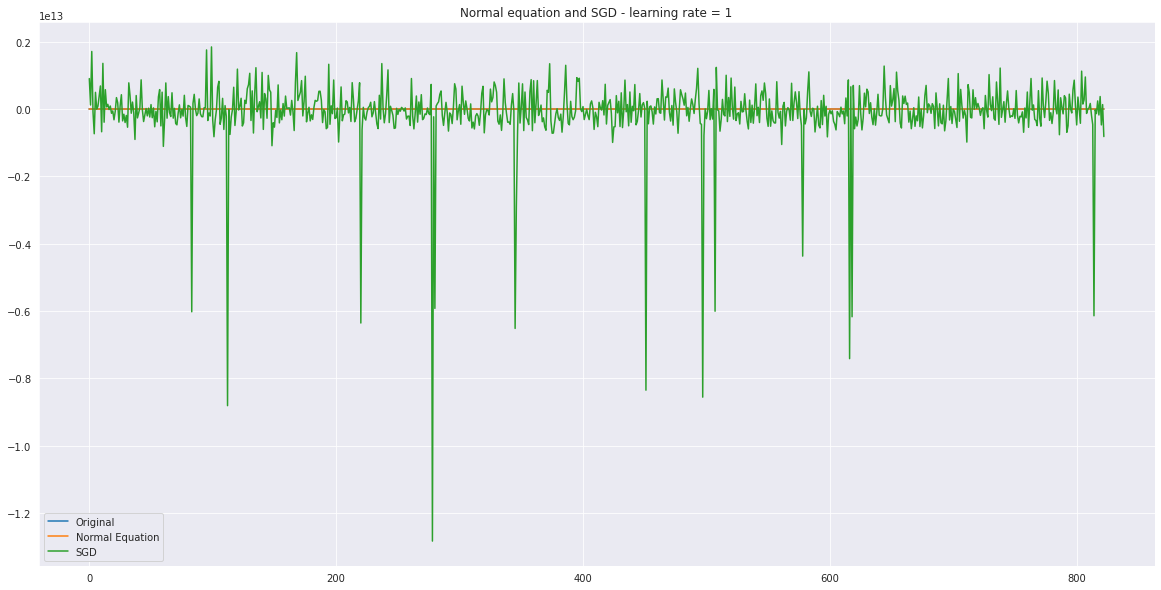

In [26]:
# TODO: Gradient Descent (GD) with 3 different learning rates. You can use scikit-learn libraries.
learning_rate = [1e-7, 1e-4,1]
for i in range(len(learning_rate)):
    mod = SGDRegressor(max_iter = 50000,eta0= learning_rate[i])
    mod.fit(X_train, y_train)
    y_pred_sgd = mod.predict(X_val)
    plt.figure(figsize=(20,10))
    sns.set_style("darkgrid")
    plt.title("Normal equation and SGD - learning rate = " + str(learning_rate[i]))
    plt.plot(x_ax, y_val, label="Original")
    plt.plot(x_ax, y_pred_normal, label="Normal Equation")
    plt.plot(x_ax, y_pred_sgd, label="SGD")
    plt.grid(True)
    plt.legend()


## Conclusões da questão 2

Concluímos, a partir dos gráficos que, para valores muito pequenos do learning rate, o modelo precisa de muitas iterações para atingir a convergência, uma vez que as features possuem pouca influência no resultado. Por outro lado, para learning rates muito grandes, o modelo tenta encontrar os mínimos locais dando passos bem mais espaçados, o que o faz o gradiente mudar de valor para a direção errada, gerando predições incorretas em diferentes pontos do gráfico.

# Questão 3


3. (2 points) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


## Implementação de um modelo polinomial para regressão linear

In [27]:
# TODO: Complex model. You can use scikit-learn libraries.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

Polinômio de Grau 2:

In [28]:
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
y_pred_polyreg = polyreg.predict(X_val)
mean_squared_error(y_val, y_pred_polyreg, squared=True)

2926.4303704700574

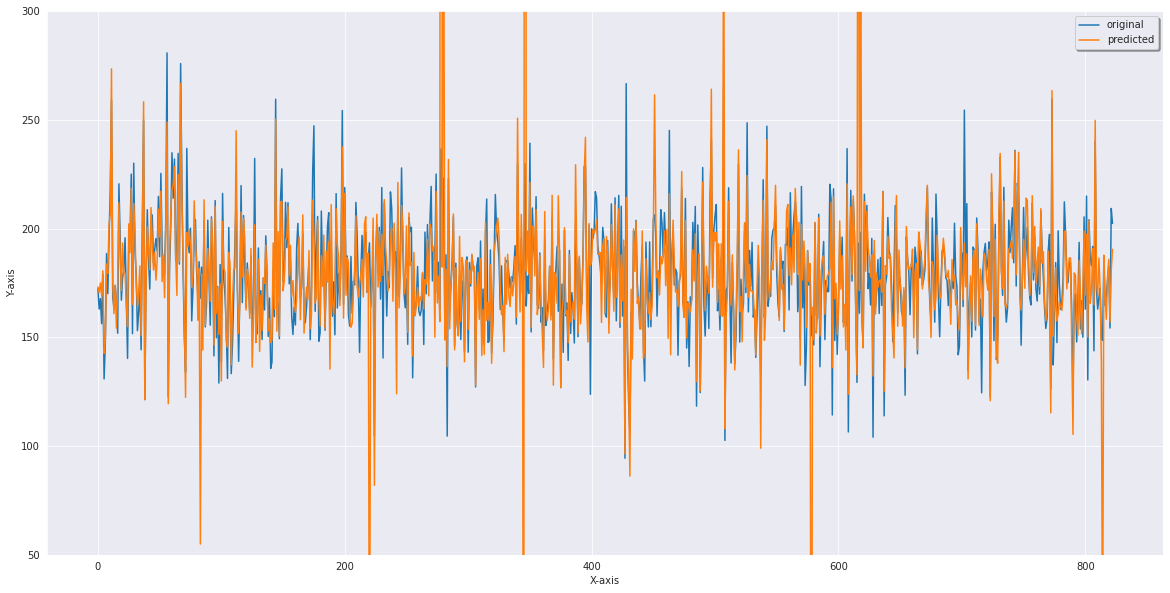

In [29]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, y_pred_polyreg, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.ylim([50,300])
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Polinômio de grau 3:

In [30]:
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
y_pred_polyreg = polyreg.predict(X_val)
mean_squared_error(y_val, y_pred_polyreg, squared=True)

181789792.53348958

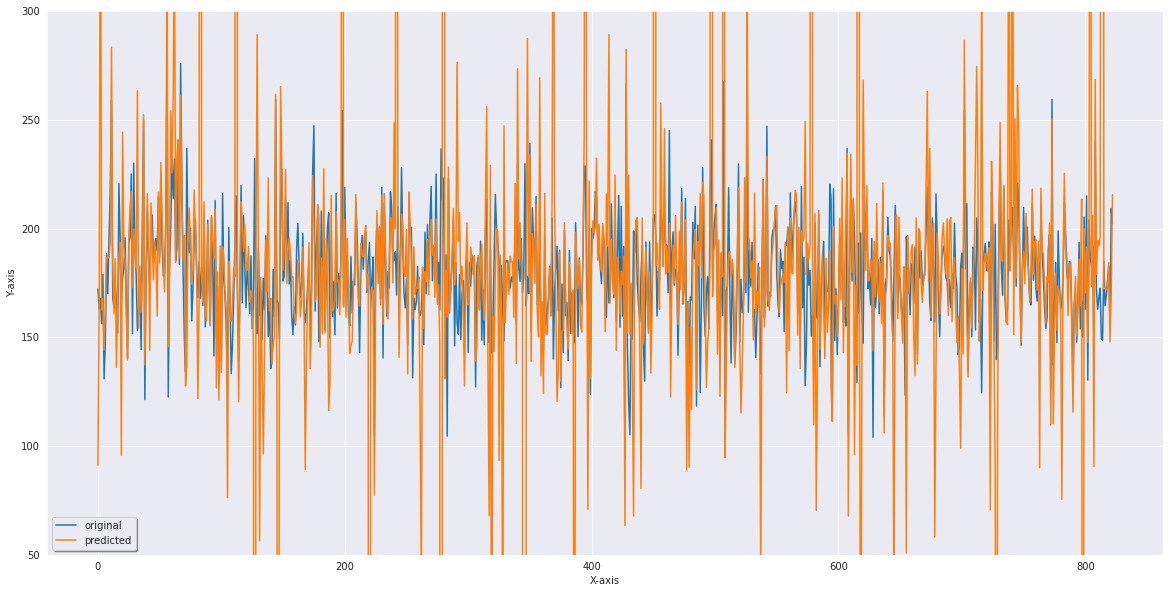

In [31]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, y_pred_polyreg, label="predicted")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.ylim([50,300])
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Vamos fazer uma análise de como os polinômios se comportam com a previsão do conjunto em que foi treinado.




In [32]:
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
y_pred_polyreg = polyreg.predict(X_train)
print(mean_squared_error(y_train, y_pred_polyreg, squared=True))

138.7075149618723


In [33]:
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
y_pred_polyreg = polyreg.predict(X_train)
print(mean_squared_error(y_train, y_pred_polyreg, squared=True))

33.038910489970576


## Conclusões da questão 3


 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


Como podemos observar, ambos os polinômios possuem um erro quadrado médio muito pequeno quando tentam prever os targets a partir do conjunto de dados em que foi treinado. Para esse conjunto, é possível notar que aumentando o grau do polinômio, menor o erro quadrado com relação ao target, já que a regressão consegue se ajustar cada vez melhor aos dados que conhece.

Por outro lado, para dados que o modelo não conhece há uma tendência de que, quanto maior o grau do polinômio, maior será o erro quadrado médio da resposta, uma vez que há a ocorrência de overfitting nos dados de treino. Assim, os modelos polinomiais se adequam melhor ao conjunto de dados do treino, mas erram mais em valores desconhecidos.





# Questão 4

4. (1 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

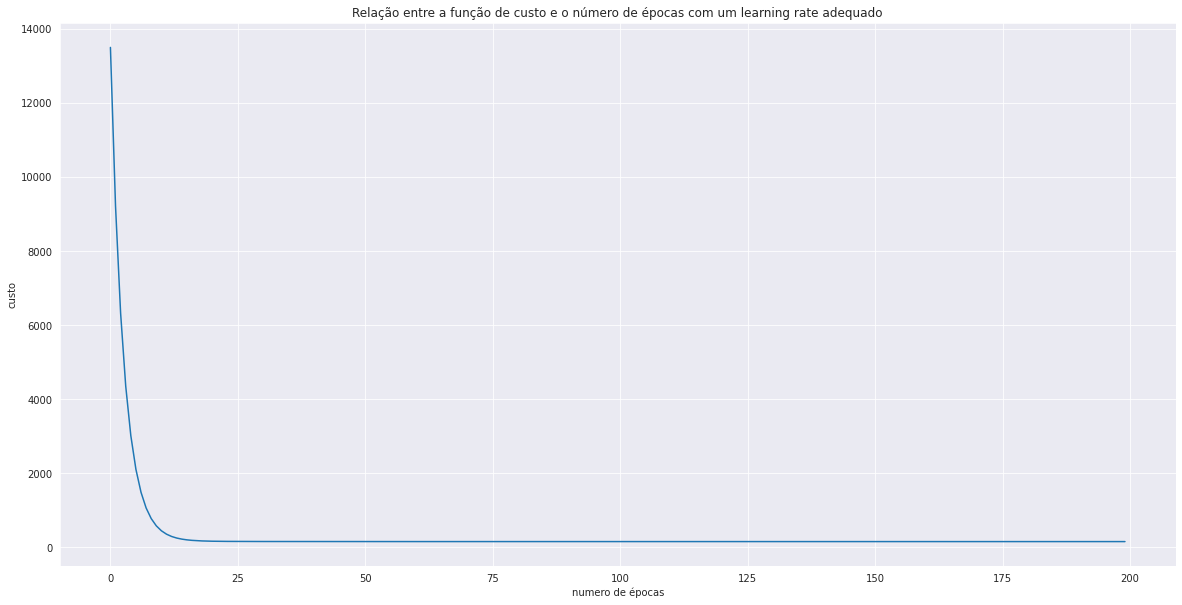

In [34]:
# TODO: Plot the cost function vs. number of iterations in the training set.
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Relação entre a função de custo e o número de épocas com um learning rate adequado")
plt.plot(np.arange(0,200), custos1)
plt.ylabel('custo')
plt.xlabel('numero de épocas')
plt.show()

In [35]:
#Gerando um modelo com learning rate inadequado
thetas=np.asmatrix([random.random() for i in range(18)])
coefs2, custos2=SGDLinReg(20, thetas, X_train, y_train, 0.01)


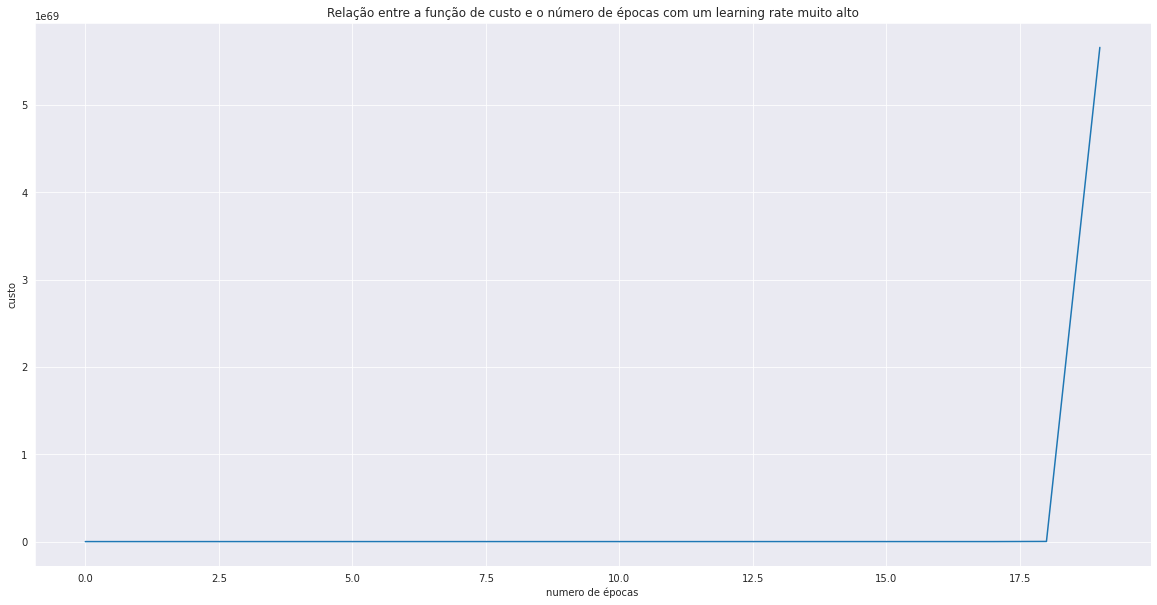

In [36]:
# TODO: Plot the cost function vs. number of iterations in the training set.
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Relação entre a função de custo e o número de épocas com um learning rate muito alto")
plt.plot(np.arange(0,20), custos2)
plt.ylabel('custo')
plt.xlabel('numero de épocas')
plt.show()

In [37]:
#Gerando um modelo com learning rate inadequado
thetas=np.asmatrix([random.random() for i in range(18)])
coefs3, custos3=SGDLinReg(200, thetas, X_train, y_train, 0.0000001)

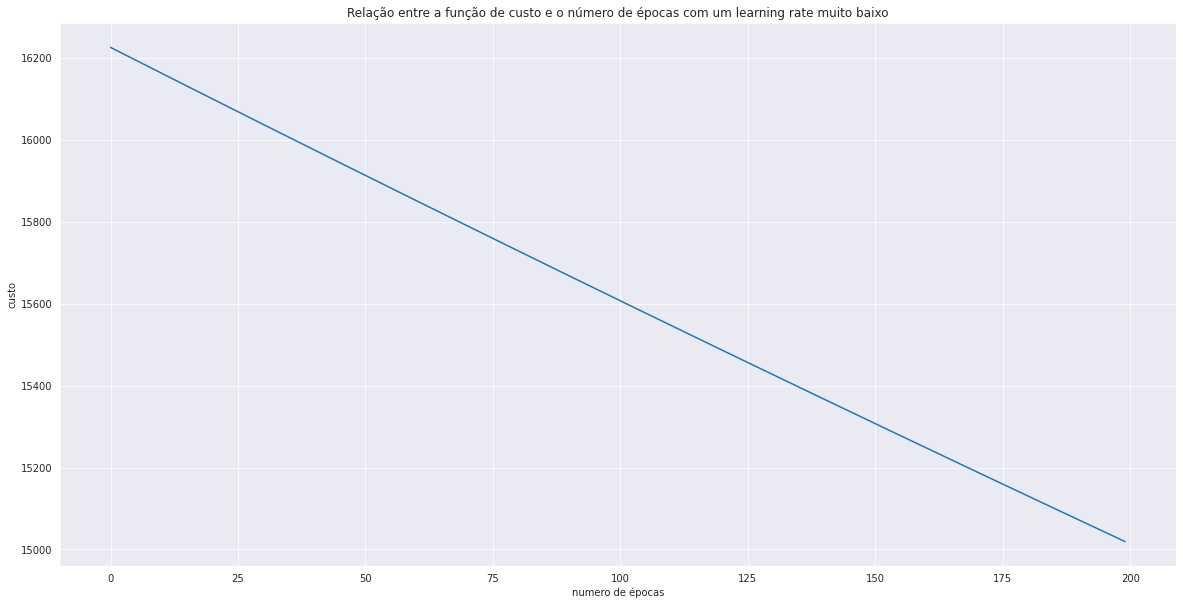

In [38]:
# TODO: Plot the cost function vs. number of iterations in the training set.
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
plt.title("Relação entre a função de custo e o número de épocas com um learning rate muito baixo")
plt.plot(np.arange(0,200), custos3)
plt.ylabel('custo')
plt.xlabel('numero de épocas')
plt.show()

## Conclusões da questão 4

> What are the conclusions? (2-4 paragraphs)

Sabendo que o objetivo da descida de gradiente é progressivamente minimizar a função de custo, a intuição nos diz que, conforme o número de épocas aumenta, o custo diminuirá. No entanto, na questão 2 foi observado que o learning rate pode afetar consideravelmente o modo com que o treinamento ocorre, e também nos resultados. Dito isso, para uma análise mais ampla, foram gerados um modelo com um learning rate maior que o utilizado na questão 1 e outro com o learning rate menor, para que seus custos fossem analisados com o passar das épocas. A partir desses dois modelos, foram gerados os gráficos vistos acima.

Analisando esses gráficos fica evidente que, para um learning rate muito baixo, como no caso do terceiro modelo, a descida de gradiente atingirá um mínimo se for executado durante uma grande quantidade de épocas, no entanto, ao compararmos esse resultado com o do primeiro modelo, vemos que foi possível utilizar um learning rate que, ainda com o custo convergindo para um mínimo, realiza a descida de gradiente mais rapidamente. Observando então o modelo com o maior learning rate, nota-se que o custo cresceu rapidamente, indo contra o propósito de uma descida de gradiente. Isso pode ter ocorrido porque, com um learning rate muito alto, o passo da descida foi tão grande que pulou o mínimo, fazendo com que tal modelo nunca convirja para o resultado esperado. 

Essa análise mostra a importância de utilizar bons parâmetros no momento de gerar o modelo, visto que, mesmo com uma implementação correta das funções de descida de gradiente, custo e predição, o resultado ainda pode ser ruim se a utilização de tais funções não for realizada de forma consciente e cuidadosa.

# Testando o modelo no arquivo de teste

Vamos testar o modelo treinado em dados que ainda não foram vistos

In [39]:
## Importação dos dados
teste=pd.read_csv("data-test.csv")

In [40]:
## Tratamento dos dados
teste.drop(columns=['pctsomecol18_24','pctprivatecoveragealone'], inplace= True)
teste['avgdeath']= (teste['avgdeathsperyear']/ teste['popest2015'])
teste.drop(columns= [ "pctpubliccoveragealone","pctpubliccoverage", "binnedinc", "geography", "pctempprivcoverage","povertypercent",
                  "avgdeathsperyear","popest2015","avganncount","medianagemale","medianagefemale", "birthrate","pctmarriedhouseholds" ,
                  "pctbachdeg25_over","pctemployed16_over"], inplace = True)

In [41]:
## Normalização dos dados
X_test = teste.drop(columns= ['target_deathrate'])
y_test = pd.Series(teste['target_deathrate'])
sc_t = StandardScaler()
X_test = sc_x.transform(X_test)
y_test = y_test.ravel()
X_test.shape

(305, 17)

In [42]:
#Teste com SGD Regressor scikit learn
mod = SGDRegressor()
mod.fit(X_train, y_train)
y_predtest_sklearn = mod.predict(X_test)
print("Erro quadratico medio do modelo do sklearn:",MSE(y_test, y_predtest_sklearn))

Erro quadratico medio do modelo do sklearn: 413.0945115024936


In [43]:
#Teste com SGD Regressor implementado
thetas=np.asmatrix([random.random() for i in range(18)])
coefstest, custostest=SGDLinReg(200, thetas, X_train, y_train, 0.0001)
y_predtest_implementado=target_prediction(coefstest, X_test)
print("Erro quadratico medio do modelo implementado:",MSE(y_test, y_predtest_implementado))

Erro quadratico medio do modelo implementado: 405.55487583229404


In [44]:
#Teste com a equação normal
X_test_normal = np.copy(X_test)
X_test_normal=np.c_[np.ones((X_test_normal.shape[0], 1)), X_test_normal] #adiciona os valores de x0=1
X_test_normal = np.asmatrix(X_test_normal)
y_predtest_normal = np.matmul(X_test_normal,theta.T)
y_predtest_normal = np.array(y_predtest_normal)
print("Erro quadratico medio do modelo da equação normal:",MSE(y_test, y_predtest_normal)[0])

Erro quadratico medio do modelo da equação normal: 405.6977843326474


In [45]:
#Teste com o modelo polinomial de grau 2
degree = 2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
y_pred2test_polyreg = polyreg.predict(X_test)
print("Erro quadratico medio do modelo da equação polinomial de grau 2:",MSE(y_test, y_pred2test_polyreg))

Erro quadratico medio do modelo da equação polinomial de grau 2: 1033.3508420971007


In [46]:
#Teste com o modelo polinomial de grau 3
degree = 3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)
y_pred3test_polyreg = polyreg.predict(X_test)
print("Erro quadratico medio do modelo da equação polinomial de grau 3:",MSE(y_test, y_pred3test_polyreg))

Erro quadratico medio do modelo da equação polinomial de grau 3: 2391130.896775663


# Informações de entrega

## Deadline

Monday, October 11th 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you did, your grade will be penalized as follows:
- October 12th 11:59 pm : grade * 0.75
- October 13th 11:59 pm : grade * 0.5
- October 14th 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**